# Exploring AirBnB in Athens
**Author**: Konstantinos Riganas

**Course**: Applied Machine Learning

This notebooks is a data analysis project on AirBnB data in Athens, Greece. The goal is to explore the data and gain useful insights that we might have not thought at first glance.

The first thing to do is to import every library necessary for our analysis. We will mainly use `pandas` to transform and manipulate data, and `matplotlib`/`seaborn` for various visualisations. At some points we will need regular expressions to extract information from the data, hence using the `re` module, and in the end we are going to create an interactive map using `folio`.

## Preprocessing
In this section we will get acquainted with the data and try to do some cleaning. This means we will import data, decide the columns we are going to keep and make any necessary transformations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import seaborn as sns
import re
import folium
%matplotlib inline

To start-off, let's read and see our data, how many columns there are and which will be more useful.

In [2]:
airbnb = pd.read_csv('data/listings.csv.gz')
airbnb.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20230921043851,2023-09-21,city scrape,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,The apartment is 3-bedroom apartment with 2-ba...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,...,4.88,4.60,4.74,00000957568,t,7,7,0,0,0.28
1,10990,https://www.airbnb.com/rooms/10990,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,...,4.89,4.78,4.75,00001070920,t,7,7,0,0,0.49
2,10993,https://www.airbnb.com/rooms/10993,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.84 · Studio · 2 bed...,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,...,4.98,4.82,4.79,00000957080,t,7,7,0,0,0.69


In [3]:
airbnb.shape

(12955, 75)

In [4]:
airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
airbnb.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.295500e+04,1.295500e+04,1.295500e+04,12948.000000,12948.000000,0.0,12955.000000,12955.000000,12955.000000,0.0,...,10986.000000,10985.000000,10985.000000,10985.000000,10983.000000,12955.000000,12955.000000,12955.000000,12955.000000,10999.000000
mean,3.450556e+17,2.023092e+13,2.074291e+08,20.817037,31.392802,NaN,37.980257,23.731754,3.681745,NaN,...,4.760182,4.851175,4.849965,4.696514,4.718835,12.039753,10.773755,1.107140,0.076032,1.795771
std,4.025301e+17,3.886869e+00,1.679894e+08,69.021257,145.382612,NaN,0.013459,0.012458,1.944475,NaN,...,0.412195,0.343202,0.371680,0.431846,0.408363,19.172056,18.542104,4.713264,0.885794,1.780333
min,1.059500e+04,2.023092e+13,1.805000e+03,1.000000,1.000000,NaN,37.950322,23.697700,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.031469e+07,2.023092e+13,5.521472e+07,1.000000,2.000000,NaN,37.969175,23.723995,2.000000,NaN,...,4.700000,4.840000,4.850000,4.600000,4.670000,1.000000,1.000000,0.000000,0.000000,0.460000
50%,5.096457e+07,2.023092e+13,1.748825e+08,5.000000,6.000000,NaN,37.978630,23.729735,4.000000,NaN,...,4.890000,4.940000,4.960000,4.830000,4.820000,4.000000,3.000000,0.000000,0.000000,1.180000
75%,7.823914e+17,2.023092e+13,3.426869e+08,20.000000,22.000000,NaN,37.988395,23.737750,4.000000,NaN,...,5.000000,5.000000,5.000000,4.980000,4.930000,14.000000,12.000000,0.000000,0.000000,2.620000
max,9.842893e+17,2.023092e+13,5.375438e+08,2565.000000,5351.000000,NaN,38.030830,23.780220,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,114.000000,114.000000,48.000000,15.000000,15.500000


In [6]:
airbnb[['neighbourhood',
       'neighbourhood_cleansed']].head(10)

,neighbourhood,neighbourhood_cleansed
0,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ
1,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ
2,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ
3,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ
4,"Athens, Attica, Greece",ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
5,NaN,ΑΜΠΕΛΟΚΗΠΟΙ
6,NaN,ΠΕΤΡΑΛΩΝΑ
7,"Athens, Attica, Greece",ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
8,NaN,ΚΕΡΑΜΕΙΚΟΣ
9,"Athens, Αττική, Greece",ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ


By taking a quick look on both neighbourhood columns, `neighbourhood_cleansed` must be a better choice when we want to analyse our data grouping by neighbourhood. We'll see how many unique values this column has.

In [7]:
airbnb.neighbourhood_cleansed.unique()

array(['ΑΜΠΕΛΟΚΗΠΟΙ', 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ', 'ΠΕΤΡΑΛΩΝΑ',
       'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'ΚΕΡΑΜΕΙΚΟΣ', 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ',
       'ΝΙΡΒΑΝΑ', 'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ', 'ΣΤΑΔΙΟ',
       'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ', 'ΚΟΛΩΝΑΚΙ', 'ΝΕΑ ΚΥΨΕΛΗ',
       'ΠΑΓΚΡΑΤΙ', 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'ΑΚΡΟΠΟΛΗ', 'ΠΑΤΗΣΙΑ',
       'ΑΝΩ ΠΑΤΗΣΙΑ', 'ΓΚΑΖΙ', 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ', 'ΙΛΙΣΙΑ', 'ΚΥΨΕΛΗ',
       'ΑΝΩ ΚΥΨΕΛΗ', 'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'ΘΗΣΕΙΟ', 'ΠΕΔΙΟ ΑΡΕΩΣ',
       'ΛΥΚΑΒΗΤΤΟΣ', 'ΖΑΠΠΕΙΟ', 'ΓΟΥΒΑ', '1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΠΡΟΜΠΟΝΑ',
       'ΓΟΥΔΙ', 'ΝΕΟΣ ΚΟΣΜΟΣ', 'ΚΟΛΩΝΟΣ', 'ΣΕΠΟΛΙΑ', 'ΒΟΤΑΝΙΚΟΣ', 'ΓΚΥΖΗ',
       'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ', 'ΠΕΝΤΑΓΩΝΟ', 'ΠΟΛΥΓΩΝΟ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ',
       'ΕΛΛΗΝΟΡΩΣΩΝ', 'ΚΟΛΟΚΥΝΘΟΥ', 'ΡΙΖΟΥΠΟΛΗ', 'ΡΗΓΙΛΛΗΣ'], dtype=object)

In [8]:
airbnb.neighbourhood_cleansed.unique().shape

(44,)

In [9]:
airbnb.neighbourhood.unique().shape

(173,)

On top of the missing values the first neighbourhood column had, there are also many more unique values, about 4 times than the cleansed ones!

Next is price, let's take a look at the pattern!

In [10]:
airbnb['price'].head()

0    $144.00
1     $70.00
2     $85.00
3     $60.00
4     $35.00
Name: price, dtype: object

The pattern seems to be clear, let's try creating a regular expression to make sure that this is correct form and then transform the data to float.

In [11]:
price_pattern = re.compile(r'\$\d+\.\d{2}')

This match has to sum up to 12955 (number of rows) if **every** price follows this pattern.

In [12]:
airbnb['price'].str.match(price_pattern).sum()

12911

Interestingly enough, there are a few rows that don't match this particular pattern. How does the non matching data look like?

In [13]:
airbnb[~airbnb['price'].str.match(price_pattern)]['price'].head()

141     $1,050.00
745     $1,000.00
932     $5,000.00
1623    $8,000.00
1839    $1,500.00
Name: price, dtype: object

We have to include a comma to the pattern to make this work. Here is the updated expression:

In [14]:
updated_price_pattern = re.compile(r'\$\d+(,\d+)?\.\d{2}')

In [15]:
airbnb['price'].str.match(updated_price_pattern).sum()

12955

It matches perfectly! That means we have to remove the dollar sign and replace comma with nothing, and cast it as float. 

In [16]:
airbnb['price'] = airbnb['price'].str.removeprefix('$').str.replace(',', '').astype(float)

After exploring our data a bit, it's time to keep the necessary columns to make things a bit easier. We will create a new dataframe containing only the columns necessary for our analysis.

In [17]:
columns = ['id', 'description', 'host_id', 'neighbourhood_cleansed', 'price', 'latitude', 'longitude', 'room_type', 'number_of_reviews', 'reviews_per_month']
airbnb_comp = airbnb[columns]

We will change `neighbourhood_cleansed` to `neighbourhood` to make it easier to use moving on.

In [18]:
airbnb_comp = airbnb_comp.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})

## Neighbourhood Listings in Descending Order

Now that we have decided which neighbourhood column to use, we will start analysing the data by finding out the most popular neighbourhood! This can be done by grouping our dataframe by the `neighbourhood` column and then counting the number of listing ids.

Therefore the first thing to do is `groupby`.

In [19]:
grouped = airbnb_comp.groupby('neighbourhood')

Now let's count the listings for each neigbourhood and create a new column with the name `number_of_listings`. After that let's reset the index to get the neigbourhood as a column.

In [20]:
neigbourhood_listings = grouped.agg(
    number_of_listings=('id', 'count')
)
neigbourhood_listings = neigbourhood_listings.reset_index()

The last thing to do is to sort the dataframe by the `number_of_listings` descending to get the most popular neigbourhoods first.

In [21]:
neigbourhood_listings.sort_values(by='number_of_listings', ascending=False, inplace=True)
neigbourhood_listings

,neighbourhood,number_of_listings
15,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,2416
23,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,1122
28,ΝΕΟΣ ΚΟΣΜΟΣ,980
26,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,979
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,817
36,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,583
30,ΠΑΓΚΡΑΤΙ,511
6,ΑΜΠΕΛΟΚΗΠΟΙ,452
21,ΚΟΛΩΝΑΚΙ,425
5,ΑΚΡΟΠΟΛΗ,386


We can clearly see that **ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ** is the most popular neigbourhood with **2416 listings**, more than double of the second most popular neighbourhood *ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ* with 1122 listings.

## Neighbourhood Prices in Descending Order

Let's move on to neigbourhood prices.

We don't need all columns in this case, so firstly we will store only the 3 we need in a `DataFrame` before grouping by neighbourhood and then calculate some price metrics.

In [22]:
neighborhood_price = airbnb_comp[['id', 'neighbourhood', 'price']]
grouped = neighborhood_price.groupby('neighbourhood')

After grouping our data by neighbourhood, we will create a table containing the number of listings, the mean price, median price, and price standard deviation, before sorting by median price descending.

In [23]:
neighborhood_price_table = grouped.agg(
    number_of_listings=('id', 'count'),
    mean_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_std=('price', 'std')
)

neighborhood_price_table.sort_values(
    by='median_price',
    ascending=False,
    inplace=True
)

neighborhood_price_table

,number_of_listings,mean_price,median_price,price_std
neighbourhood,,,,
ΡΗΓΙΛΛΗΣ,5,367.800000,120.0,578.622675
ΖΑΠΠΕΙΟ,161,224.068323,114.0,641.163173
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,2416,140.650662,104.0,229.183015
ΑΚΡΟΠΟΛΗ,386,195.344560,100.0,703.321565
ΚΟΛΩΝΑΚΙ,425,128.595294,100.0,104.431349
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,1122,120.284314,90.5,104.613533
ΘΗΣΕΙΟ,386,126.492228,90.0,124.176775
ΚΕΡΑΜΕΙΚΟΣ,343,123.883382,89.0,136.367487
ΛΥΚΑΒΗΤΤΟΣ,162,104.561728,75.0,87.859850


The neighbourhoods highest in price are exactly in the center of Athens around important places like Syntagma Square (and the Parliament), Monastiraki Square and the Parthenon, which is honestly not surprising at all. The further away we go from the monuments and central arteries of the city, the lower the prices are getting.

## Availability per Day

Now it's time to see the availability for one year. We will load the calendar data into a new Dataframe.

In [24]:
calendar = pd.read_csv('data/calendar.csv.gz',
                      parse_dates=['date'])

In [25]:
calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,$150.00,$60.00,1,180
1,10595,2023-09-22,t,$150.00,$60.00,1,180
2,10595,2023-09-23,t,$150.00,$75.00,1,180


In [26]:
calendar.shape

(4728229, 7)

We want all the listings that are available, therefore we want to keep every record with 't' in the `available` column.

In [27]:
available_listings = calendar[calendar.available == 't']

Group by the date and and then count the number of listings per day.

In [28]:
grouped_available = available_listings.groupby('date')

available_listings_per_day = grouped_available.agg({'available': 'count'})

available_listings_per_day.reset_index(inplace=True)

Since we want to plot availability per day, we could use a line plot to see how availability trends, and see if there is anything of interest here.

C:\Users\kosta\AppData\Local\Temp\ipykernel_67332\1425734521.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)


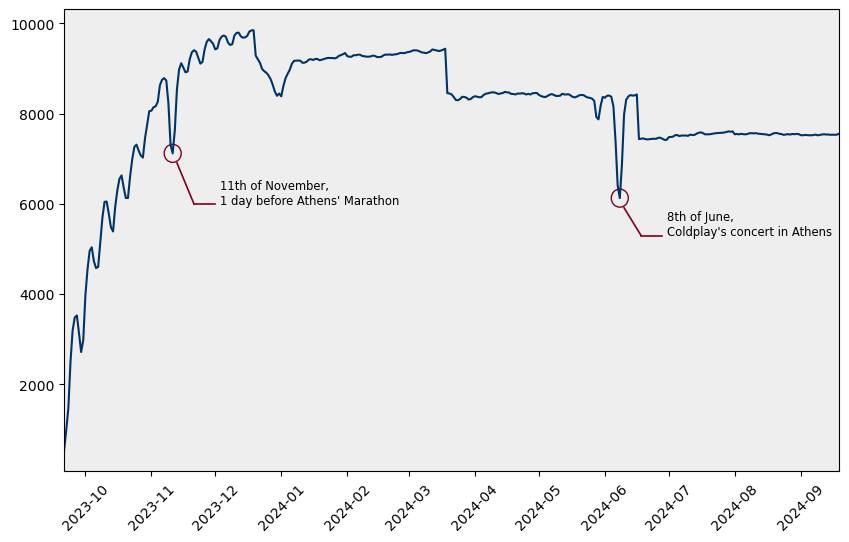

In [29]:
# plot the basic line chart with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(available_listings_per_day['date'], available_listings_per_day['available'], color='#003366')
ax.set_facecolor('#eeeeee')
ax.set_xlim([min(available_listings_per_day['date']), max(available_listings_per_day['date'])])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

# create and add a mark on the graph to explain why there is a steep drop in November
november_lowpoint = mdates.datestr2num('2023-11-11')
november_point = patches.Ellipse((november_lowpoint, 7121), width=8, height=400, fill=False, color='#800020')
ax.add_patch(november_point)
nvmbr_line1 = plt.Line2D((november_lowpoint+2, november_lowpoint+10), (6910, 6000), color='#800020', linewidth=1.2)
ax.add_line(nvmbr_line1)
nvmbr_line2 = plt.Line2D((november_lowpoint+10, november_lowpoint+20), (6000, 6000), color='#800020', linewidth=1.2)
ax.add_line(nvmbr_line2)
ax.text(november_lowpoint+22, 6000, '11th of November,\n1 day before Athens\' Marathon', fontsize='small')

# create and add a mark on the graph to explain why there is a steep drop in June
june_lowpoint = mdates.datestr2num('2024-06-08')
june_point = patches.Ellipse((june_lowpoint, 6129), width=8, height=400, fill=False, color='#800020')
ax.add_patch(june_point)
june_line1 = plt.Line2D((june_lowpoint+2, june_lowpoint+10), (5915, 5300), color='#800020', linewidth=1.2)
ax.add_line(june_line1)
june_line2 = plt.Line2D((june_lowpoint+10, june_lowpoint+20), (5300, 5300), color='#800020', linewidth=1.2)
ax.add_line(june_line2)
_ = ax.text(june_lowpoint+22, 5300, '8th of June,\nColdplay\'s concert in Athens', fontsize='small')

This plot actually has some interesting points. From October to late December we can see an *upwards trend*, but there are a **couple of disruptions**: one in **early November** and one in **late December and early January**. The latter can be explained from *Christmas and New Year's holidays* vacations where people might have already booked a place to stay. We can also identify a *huge drop* in availability in **early June** as well, which might seem odd at first. Let's explore these two 'anomalies'.

In [30]:
available_listings_per_day[(available_listings_per_day.date.dt.month == 11) & (available_listings_per_day.date.dt.day < 15)]

,date,available
41,2023-11-01,8066
42,2023-11-02,8143
43,2023-11-03,8164
44,2023-11-04,8264
45,2023-11-05,8630
46,2023-11-06,8752
47,2023-11-07,8788
48,2023-11-08,8735
49,2023-11-09,8229
50,2023-11-10,7312


**11th of November** seems to be the date where the lowest point in this disruption exists. Upon further investigation, we can find that on *11th and 12th of November* the [40th Athens Marathon](https://www.athensauthenticmarathon.gr/site/index.php/en/) takes place, which can explain the reason why there is less availability from 10th to 12th of November, since people from all over Greece might come to participate, and therefore need a place to stay.

In [31]:
available_listings_per_day[(available_listings_per_day.date.dt.month == 6) & (available_listings_per_day.date.dt.day < 15)]

,date,available
254,2024-06-01,8355
255,2024-06-02,8397
256,2024-06-03,8403
257,2024-06-04,8376
258,2024-06-05,8165
259,2024-06-06,7392
260,2024-06-07,6410
261,2024-06-08,6129
262,2024-06-09,6867
263,2024-06-10,7978


What is more interesting to see is why there is a huge drop in availability for a few days in June. Actually this is pretty much explained by the **[Coldplay concerts](https://www.coldplay.com/tour/)** taking place in Athens on *8th and 9th* of that month. One might wonder what the effect of the OAKA incident will be on the availability when the dataset gets updated.

## Reviews, Occupacy per Listing, Average Income

It's time to take a look into the reviews!

In [32]:
airbnb_comp.number_of_reviews

0         42
1         66
2         92
3         30
4        514
        ... 
12950      0
12951      0
12952      0
12953      0
12954      0
Name: number_of_reviews, Length: 12955, dtype: int64

We will check the **lowest** and **highest** values of reviews.

In [33]:
(airbnb_comp.number_of_reviews.min(), airbnb_comp.number_of_reviews.max())

(0, 865)

There doesn't seem to be anything weird in the number of reviews. The lowest value is 0, which we'll use as the lower bound of the first bin, and the highest value is 865. To make the upper bound of the last bin more rounded up, we are defining a function that returns the closest 100th of a vector.

In [34]:
def next_closest_100th(vec):
    return np.ceil(vec / 100) * 100

With the help of the function we defined, we will create some bins to use in the histogram.

In [35]:
bins = np.linspace(0, next_closest_100th(airbnb_comp.number_of_reviews.max()), 50)
bins

array([  0.        ,  18.36734694,  36.73469388,  55.10204082,
        73.46938776,  91.83673469, 110.20408163, 128.57142857,
       146.93877551, 165.30612245, 183.67346939, 202.04081633,
       220.40816327, 238.7755102 , 257.14285714, 275.51020408,
       293.87755102, 312.24489796, 330.6122449 , 348.97959184,
       367.34693878, 385.71428571, 404.08163265, 422.44897959,
       440.81632653, 459.18367347, 477.55102041, 495.91836735,
       514.28571429, 532.65306122, 551.02040816, 569.3877551 ,
       587.75510204, 606.12244898, 624.48979592, 642.85714286,
       661.2244898 , 679.59183673, 697.95918367, 716.32653061,
       734.69387755, 753.06122449, 771.42857143, 789.79591837,
       808.16326531, 826.53061224, 844.89795918, 863.26530612,
       881.63265306, 900.        ])

(0.0, 900.0)

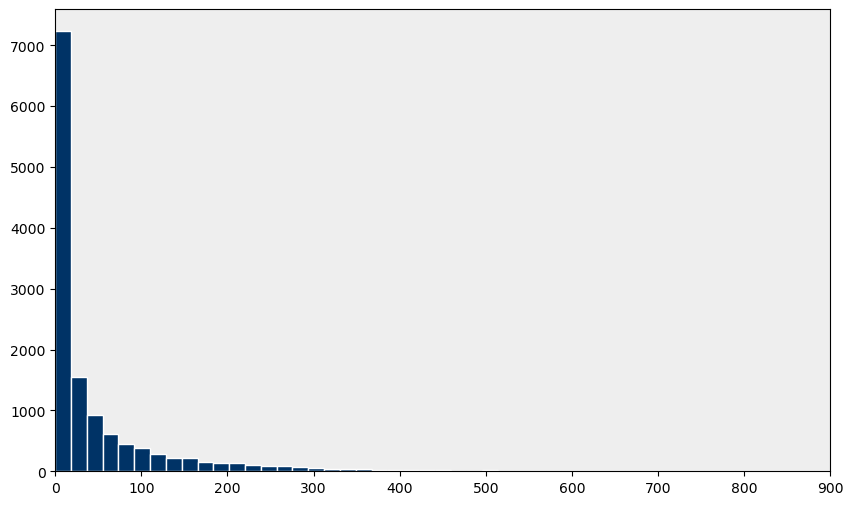

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(x=airbnb_comp.number_of_reviews, bins=bins, color='#003366', edgecolor='white')
ax.set_facecolor('#eeeeee')
ax.set_xlim((bins.min(), bins.max()))

Looking at the histogram we can see that **most** listings don't get more than 19 reviews (first bin upper bound rounded up).

Now we will move on calculating the average income. We will start by taking a look into `reviews_per_month` column.

In [37]:
airbnb_comp.reviews_per_month

0        0.28
1        0.49
2        0.69
3        0.19
4        3.87
         ... 
12950     NaN
12951     NaN
12952     NaN
12953     NaN
12954     NaN
Name: reviews_per_month, Length: 12955, dtype: float64

Assuming that half of the bookings result in a review, let's multiply average monthly reviews by **2** to get *occupacy per month*. After that assuming that a booking is **3 nights** long we will multiply by 3 to get *average nights per month*. To find the average income per listing per month, we have to get the *average listing price*. We could approach this in various ways. Firstly, we could get the **overall average of all listing prices**. Another option is to use the table we created previously containing the *mean prices per neighbourhood* and use that to calculate the income per listing. For simplicity reasons we will pick the first option.

In [38]:
average_occupacy_per_month = airbnb_comp.reviews_per_month * 2
average_nights_per_month = average_occupacy_per_month * 3
average_listing_price = airbnb_comp.price.mean()
average_income_per_month_per_listing = average_nights_per_month * average_listing_price

In [39]:
average_income_per_month = average_income_per_month_per_listing.mean()
average_income_per_month

1190.1502553966434

On average, monthly income is about **1190 dollars**. If we chose a different way to calculate the income, e.g. using the mean price by neighbourhood instead of the mean price of all listings, the result would definitely be different.

## Listings per Room Type

Let's take a look into **room types**, and how many listings refer to each one. Obviously, the first step is to group by the `room_type` column, and then we are going to **count the number of ids** to get the number of listings as we have done throughout the rest of the notebook. To calculate the percentage of each room type, we will simply **divide** (using the `div` method) the aggregated table by the **total listings**, and then **multiply by 100**.

In [40]:
listings_per_room_type = airbnb_comp.groupby('room_type').agg(number_of_listings=('id', 'count'))
listings_per_room_type['listings_%'] = listings_per_room_type['number_of_listings'].div(listings_per_room_type['number_of_listings'].sum()) * 100
listings_per_room_type

,number_of_listings,listings_%
room_type,,
Entire home/apt,11652,89.942107
Hotel room,105,0.810498
Private room,1113,8.591277
Shared room,85,0.656117


Almost **90%** of the listings are **entire homes** or **apartments**, which makes sense since AirBnB had started as a platform where ordinary people would list their own homes to get some extra money.

Now, we'll group by both neighbourhood and room type and see what happens in each neighbourhood. We expect most, if not all of them, to have **higher** `Entire home/apt` number of listings than any other type.

In [41]:
listings_per_neighbourhood_and_room_type = airbnb_comp.groupby(['neighbourhood', 'room_type']).agg(number_of_listings=('id', 'count'))
pd.set_option('display.max_rows', None)
listings_per_neighbourhood_and_room_type

number_of_listings
neighbourhood                    room_type                          
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                   Entire home/apt                  55
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                 Entire home/apt                  33
                                 Private room                      5
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ Entire home/apt                 686
                                 Hotel room                        4
                                 Private room                    117
                                 Shared room                      10
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                   Entire home/apt                  91
                                 Private room                      8
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                Entire home/apt                  74
                                 Private room                      2
ΑΚΡΟΠΟΛΗ                         Entire home/apt                 360
                                 Hotel room                        6
                                 Private room                     20
ΑΜΠΕΛΟΚΗΠΟΙ                      Entire home/apt                 431
                                 Private room                     17
                                 Shared room                       4
ΑΝΩ ΚΥΨΕΛΗ                       Entire home/apt                 103
                                 Private room                     16
ΑΝΩ ΠΑΤΗΣΙΑ                      Entire home/apt                  61
                                 Private room                      3
ΒΟΤΑΝΙΚΟΣ                        Entire home/apt                  73
                                 Private room                      7
ΓΚΑΖΙ                            Entire home/apt                 101
                                 Private room                      5
ΓΚΥΖΗ                            Entire home/apt                 104
                                 Private room                     14
ΓΟΥΒΑ                            Entire home/apt                  73
                                 Private room                      2
ΓΟΥΔΙ                            Entire home/apt                 209
                                 Hotel room                        1
                                 Private room                     18
                                 Shared room                       2
ΕΛΛΗΝΟΡΩΣΩΝ                      Entire home/apt                  70
                                 Private room                      3
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ           Entire home/apt                2059
                                 Hotel room                       41
                                 Private room                    281
                                 Shared room                      35
ΖΑΠΠΕΙΟ                          Entire home/apt                 157
                                 Hotel room                        1
                                 Private room                      3
ΘΗΣΕΙΟ                           Entire home/apt                 335
                                 Hotel room                       12
                                 Private room                     39
ΙΛΙΣΙΑ                           Entire home/apt                 200
                                 Private room                     16
ΚΕΡΑΜΕΙΚΟΣ                       Entire home/apt                 310
                                 Hotel room                        8
                                 Private room                     19
                                 Shared room                       6
ΚΟΛΟΚΥΝΘΟΥ                       Entire home/apt                  15
                                 Private room                      1
ΚΟΛΩΝΑΚΙ                         Entire home/apt                 392
                                 Hotel room                       10
                                 Private room                     23
ΚΟΛΩΝΟΣ                          Entire home/apt

## Prices per Day

Before we dive into prices per day, we should check the columns we have in the calendar dataframe.

In [42]:
calendar.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

We can see 2 price columns: `price` and `adjusted_price`. Because there are over 4 million data, we will take a sample 100.000 rows and check how many of them have different `price` and `adjusted_price` values.

In [43]:
calendar['price'] = calendar['price'].str.removeprefix('$').str.replace(',', '').astype(float)
calendar['adjusted_price'] = calendar['adjusted_price'].str.removeprefix('$').str.replace(',', '').astype(float)

In [44]:
total_rows = calendar.shape[0]

np.random.seed(42)
selection = np.zeros(total_rows, dtype=bool)
selection[:100_000] = True
np.random.shuffle(selection)

sample = calendar.iloc[selection]

different_prices = sample['price'] != sample['adjusted_price']
different_prices.sum() / len(different_prices) * 100

8.298

In [45]:
adjusted_prices_smaller = sample['adjusted_price'] < sample['price']
adjusted_prices_smaller.sum() / len(different_prices) * 100

8.097

For the most part, it seems that there is a difference in about 8% of the data. If we check the data a bit we can see that for the most part the adjusted price is less than the actual price. This could be explained by the fact that the owners might want to decrease the price to attract more people. Nevertheless, for the rest of this analysis we'll use the `adjusted_price`, as it seems more accurate.

The next step is to create a table, which can be simply done by using the **pivot_table** method, with `listing_id` as rows, `date` as columns and `adjusted_price` as values.

In [46]:
pivot = calendar.pivot_table(values='adjusted_price', index='listing_id', columns='date')

We created the table, how should we visualise it? One idea would be to create *trend lines*, but this will create complete and utter chaos in the graph, since most likely the data will fall one over the other. Another one is to make a **heatmap**! The reason is that we can actually depict **each listing every day** and look for **increases** and **decreases** using a colormap.

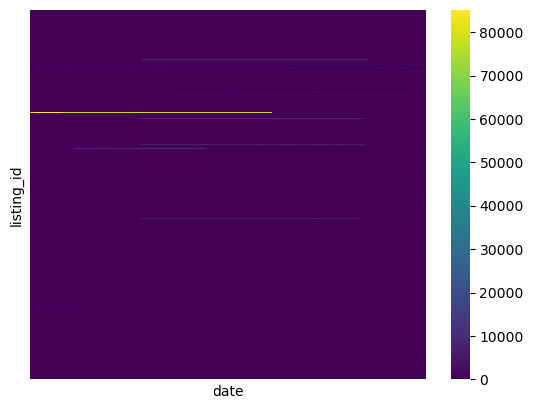

In [47]:
hm = sns.heatmap(pivot, cmap='viridis', xticklabels=[], yticklabels=[])

Easier said than done. It looks like the problem is that we have some *outliers* with large values, making the heatmap unreadable. If we **remove those outliers** we can get a better look at the prices per day for each listing. Fortunately, statistics gives us a formula to [find such values](https://en.wikipedia.org/wiki/Interquartile_range#Outliers) as we can see below:

$IQR = Q_3 - Q_1$

Therefore, to remove high outliers we need to use the following **condition**:

High Outlier: $val > Q_3 + 1.5 \times IQR$

In [48]:
q1 = calendar['adjusted_price'].quantile(0.25)
q3 = calendar['adjusted_price'].quantile(0.75)
iqr = q3 - q1

temp = pivot > q3 + 1.5 * iqr
pivot = pivot[temp.sum(1) == 0]

We filtered our data, and we are ready to once again create a heatmap to visualise our table. We are customising our `xticklabels` to show a tick every first of the month.

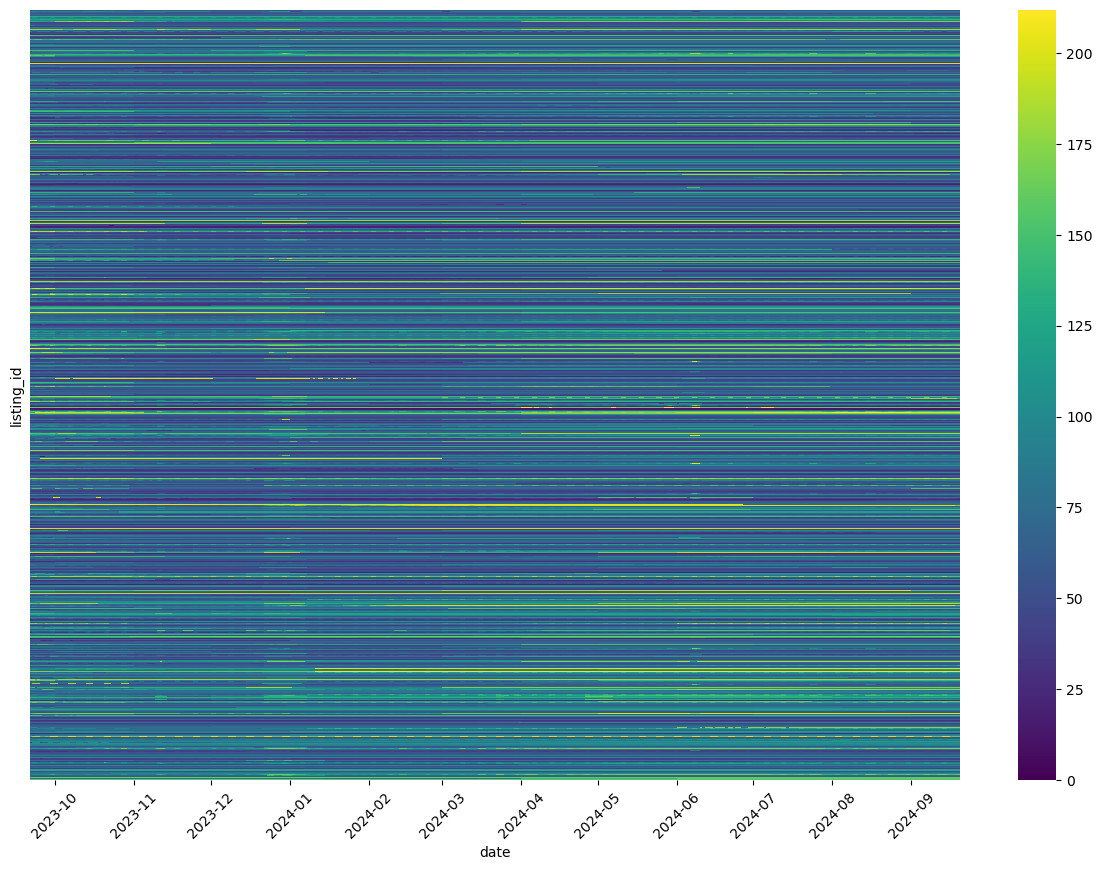

In [49]:
first_of_the_month = pivot.columns.day == 1
date_labels = pivot.columns[first_of_the_month]
ticks = pivot.columns.get_indexer(date_labels)
date_labels = [date.strftime('%Y-%m') for date in date_labels]

plt.figure(figsize=(15, 10))
hm = sns.heatmap(pivot, cmap='viridis', yticklabels=[])
_ = hm.set_xticks(ticks, date_labels, rotation = 45)

If we take a look back to the availability graph, and see the **hot periods** (10th-12th November, Christmas-New Year, 8th-9th June), in this heatmap we can see a **rise** in the prices around those days, which probably is **not a coincidence**!

## Listings per Host

It's time take a look into the hosts. First of all, we have to group our data, and we'll do it by the `host_id`. After that, we'll count the **number of listings** and sort the values *descending*.

In [50]:
listings_per_host = airbnb_comp.groupby('host_id').agg(number_of_listings=('id', 'count'))
listings_per_host.sort_values('number_of_listings', ascending=False, inplace=True)

Next thing to do is create a plot with ranking on the x-axis and the number of listings on the y-axis. Before that we will create the ranking **calling** the `rank` method pandas provides us. If there are hosts with the same number of listings, they will have a ranking depending on the **order** the method sees them, and so we use the **`method='first'`** parameter.

In [51]:
listings_per_host['ranking'] = listings_per_host.number_of_listings.rank(ascending=False, method='first')

Let's plot the data!

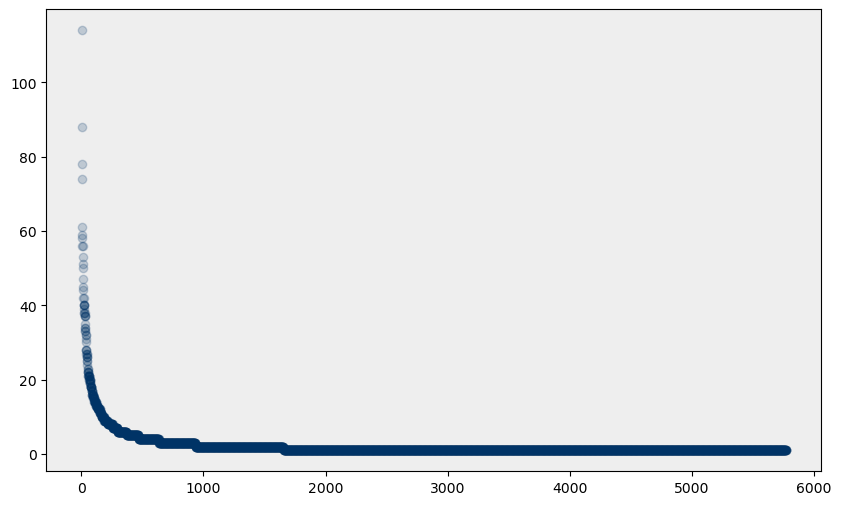

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data=listings_per_host, x='ranking', y='number_of_listings', color='#003366', alpha=0.2)
ax.set_facecolor('#eeeeee')

This is interesting! There are some hosts that have **many** listings. Probably there have to be some kind of *asset management firms* doing business in the AirBnB platform.

Let's examine if the relationship between the ranking and the number of listings is somewhat **logarithmic**.

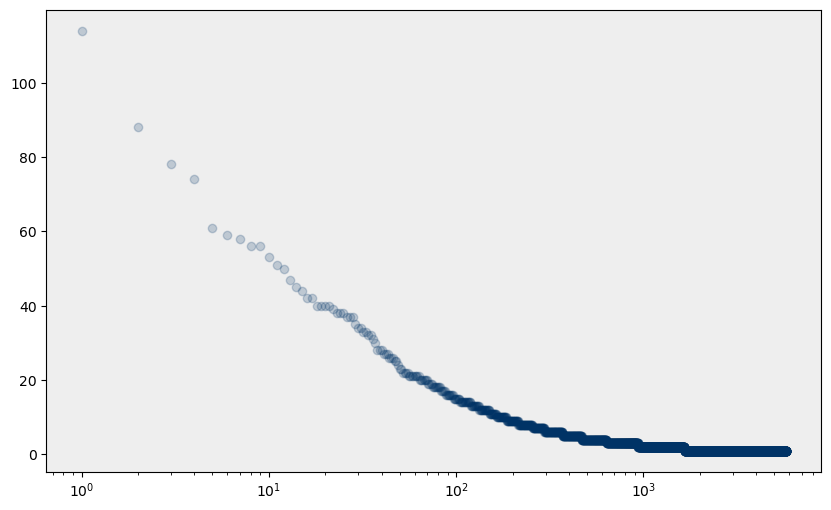

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data=listings_per_host, x='ranking', y='number_of_listings', color='#003366', alpha=0.2)
ax.set_facecolor('#eeeeee')
ax.set_xscale('log')

We can see this scatter plot creates something **resembling** a line, though not perfect. The further the ranking increase we see the scatter points making a horizontal line, but that's because we **used the first method** when we calculated the ranking, and that's why the graph seems **less linear**.

## Visualise Listings

Last but not least, we will visualise the listings on an **map** using `folium`! First things first, we will keep the necessary data, namely: `latitude`, `longitude` and `description`.

In [54]:
map_data = airbnb_comp[['latitude', 'longitude', 'description']]

The **initial position** where the map is centered will be calculate by the *average latitude* and *average longitude*.

In [55]:
avg_lat = map_data.latitude.mean()
avg_lgt = map_data.longitude.mean()

And it's time to create the map with the location we decided above, and `max_zoom=12` which means that we cannot zoom more than level 12.

After that we use a loop to **add markers** for each listing, along with the **description** of that listing as a popup after the user clicks a marker.

In the end we save the map as an **.html file** to open it on a browser and make it *easier* to look at the map.

In [56]:
m = folium.Map(location=(avg_lat, avg_lgt), zoom_start=12, max_zoom=12)

for _, listing in map_data.iterrows():
    folium.Marker(
        location=[listing.latitude, listing.longitude],
        tooltip='See details',
        popup=folium.Popup(listing.description, max_width=500),
        icon=folium.Icon(prefix='fa', icon='circle-info')
    ).add_to(m)
    
m.save('airbnb_listings_in_athens.html')